In [ ]:
#Naive Bayes and Text Mining
# TEXT CLASSIFICATION USING NAIVE BAYES & SENTIMENT ANALYSIS ON BLOG POSTS

In [1]:
 #Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from textblob import TextBlob


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\APPY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\APPY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\APPY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


<Axes: title={'center': 'Blog Category Distribution'}, xlabel='Labels'>

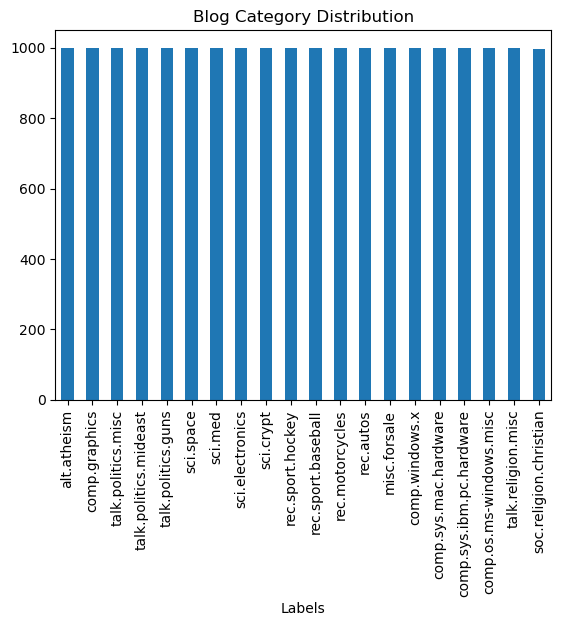

In [2]:
# Load Dataset & EDA
# Load data
df = pd.read_csv('blogs_categories.csv')
df.head()

# Basic Info
df.info()
df['Labels'].value_counts().plot(kind='bar', title='Blog Category Distribution')


In [3]:
#Preprocess Text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

df['Cleaned_Data'] = df['Data'].astype(str).apply(preprocess_text)
df[['Data', 'Cleaned_Data']].head()




,Data,Cleaned_Data
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,xref cantaloupesrvcscmuedu altatheism altathei...
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,xref cantaloupesrvcscmuedu altatheism altathei...
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,xref cantaloupesrvcscmuedu altatheism altpolit...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,xref cantaloupesrvcscmuedu altatheism socmotss...


In [4]:
#Feature Extraction (TF-IDF)
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Cleaned_Data'])
y = df['Labels']


In [5]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
#Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.9035

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.75      0.80      0.78       173
           comp.graphics       0.88      0.91      0.89       179
 comp.os.ms-windows.misc       0.94      0.89      0.91       226
comp.sys.ibm.pc.hardware       0.87      0.83      0.85       204
   comp.sys.mac.hardware       0.89      0.96      0.92       205
          comp.windows.x       0.94      0.94      0.94       186
            misc.forsale       0.91      0.81      0.86       190
               rec.autos       0.92      0.95      0.93       203
         rec.motorcycles       1.00      0.97      0.98       218
      rec.sport.baseball       0.99      0.98      0.99       192
        rec.sport.hockey       0.98      0.99      0.98       203
               sci.crypt       0.91      0.99      0.95       200
         sci.electronics       0.95      0.91      0.93       227
                 sci.med       1.

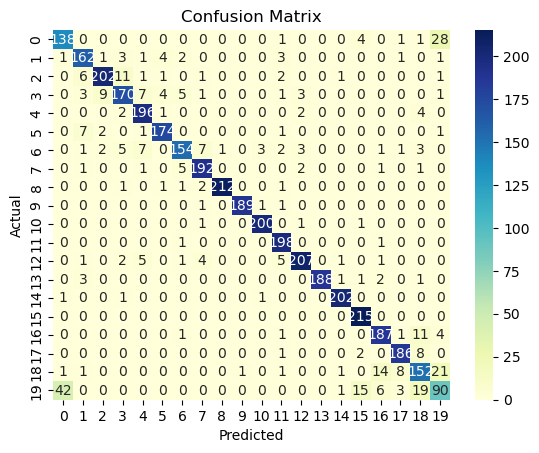

In [7]:
#Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


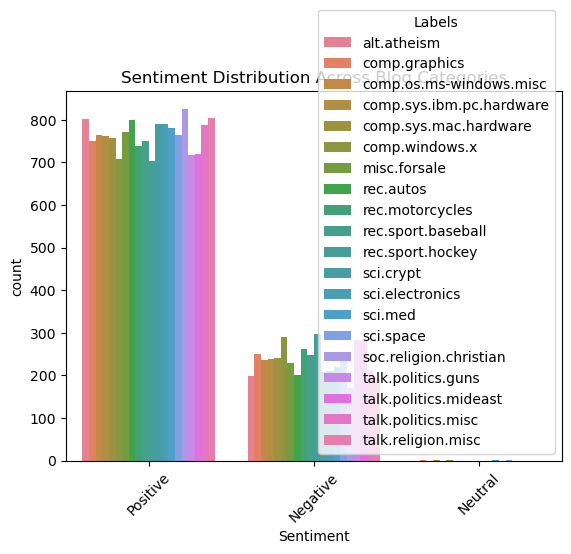

In [8]:
#Sentiment Analysis
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].astype(str).apply(get_sentiment)
df[['Data', 'Sentiment']].head()

# Distribution
sns.countplot(data=df, x='Sentiment', hue='Labels')
plt.title("Sentiment Distribution Across Blog Categories")
plt.xticks(rotation=45)
plt.show()


In [9]:
# Sentiment counts per category
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)
print(sentiment_distribution)

# Overall Insights
print("\n Sentiment Analysis shows which categories are more Positive/Negative/Neutral.")
print(" Naive Bayes Classifier achieved {:.2f}% accuracy.".format(accuracy_score(y_test, y_pred)*100))

Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                  199.0      0.0     801.0
comp.graphics                250.0      1.0     749.0
comp.os.ms-windows.misc      236.0      0.0     764.0
comp.sys.ibm.pc.hardware     238.0      1.0     761.0
comp.sys.mac.hardware        242.0      0.0     758.0
comp.windows.x               290.0      2.0     708.0
misc.forsale                 229.0      0.0     771.0
rec.autos                    201.0      0.0     799.0
rec.motorcycles              262.0      0.0     738.0
rec.sport.baseball           249.0      0.0     751.0
rec.sport.hockey             297.0      0.0     703.0
sci.crypt                    209.0      0.0     791.0
sci.electronics              210.0      1.0     789.0
sci.med                      219.0      0.0     781.0
sci.space                    235.0      1.0     764.0
soc.religion.christian       171.0      0.0     826.0
talk.politics.guns          